In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import shutil 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import random
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.models import load_model, save_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, models
from IPython.display import HTML

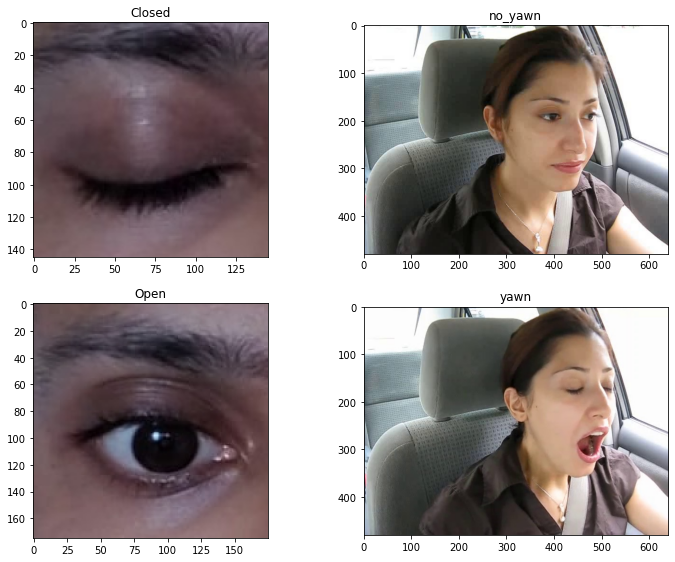

In [6]:
activity_map = {'Closed': 'Closed', 
                'Open': 'Open',
                'no_yawn' : 'no_yawn',
                'yawn' : 'yawn'
               }
plt.figure(figsize = (12, 25))
image_count = 1
BASE_URL = 'Data_Drowsiness_Detection/train/'
for directory in os.listdir(BASE_URL):
    if directory[0] != '.':
        for i, file in enumerate(os.listdir(BASE_URL + directory)):
            if i == 1:
                break
            else:
                fig = plt.subplot(5, 2, image_count)
                image_count += 1
                image = mpimg.imread(BASE_URL + directory + '/' + file)
                plt.imshow(image)
                plt.title(activity_map[directory])

In [6]:
root_directory = "Data_Drowsiness_Detection/train/"
output_directory = "Working/"
os.makedirs(output_directory, exist_ok=True)

In [ ]:
def augmentation_and_save_image_for_eyes(image_paths, output_folder_path, save=True):
    for image_path in image_paths:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Additional rotations: 90 degrees and 180 degrees
        rotated_img_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
        rotated_img_180 = cv2.rotate(img, cv2.ROTATE_180)

        # Scaling
        scale_factor = 5
        scaled_img = cv2.resize(img, None, fx=scale_factor, fy=scale_factor)

        # Grayscale
        grayscale_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        grayscale_img = cv2.cvtColor(grayscale_img, cv2.COLOR_GRAY2RGB)

        # Gaussian Noise
        mean = 0
        std_dev = 50
        noise = np.random.normal(mean, std_dev, img.shape)
        noisy_img = np.clip(img + noise, 0, 255).astype(np.uint8)

        # Shifts
        shifts = [(30, 0), (0, 30)]  # Horizontal and vertical shifts
        shifted_images = [
            cv2.warpAffine(img, np.float32([[1, 0, shift[0]], [0, 1, shift[1]]]), (img.shape[1], img.shape[0])) for
            shift in shifts]

        if save:
            # Save the augmented images
            save_prefix = os.path.basename(image_path).split('.')[0]
            for idx, augmented_img in enumerate(
                    [rotated_img_90, rotated_img_180, scaled_img, grayscale_img, noisy_img] + shifted_images):
                augmentation_type = ['rotated_90', 'rotated_180', 'scaled', 'grayscale', 'noisy', 'shifted_horizontal',
                                     'shifted_vertical']
                cv2.imwrite(os.path.join(output_folder_path, f'{save_prefix}_{augmentation_type[idx]}.jpg'),
                            cv2.cvtColor(augmented_img, cv2.COLOR_RGB2BGR))
            cv2.imwrite(os.path.join(output_folder_path, f'{save_prefix}.jpg'),
                            cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
            
        else:
            return [rotated_img_90, rotated_img_180, scaled_img, grayscale_img, noisy_img] + shifted_images

In [13]:
labels = os.listdir(root_directory)
for label in labels:
    if label == 'yawn' or label == 'no_yawn':
        continue
    images = os.listdir(os.path.join(root_directory, label))
    images = [os.path.join(root_directory, label, img) for img in images]

    os.makedirs(os.path.join(output_directory, label), exist_ok=True)

    # Copy original images to output directory
    for img_path in images:
        img_name = os.path.basename(img_path)
        output_path = os.path.join(output_directory, label, img_name)
        shutil.copy(img_path, output_path)

    # Apply augmentation and save augmented images
    augmentation_and_save_image_for_eyes(images, os.path.join(output_directory, label))

In [6]:
def read_images(directory_path, image_paths, labels, label):
    for filename in os.listdir(directory_path):
        # Construct the full file path
        file_path = os.path.join(directory_path, filename)

        # Check if the file is a regular file (not a directory)
        if os.path.isfile(file_path):
            # Append the file path to the list
            image_paths.append(file_path)
            labels.append(label)

In [15]:
def plot_train_history(history):
    """
    Plot the validation accuracy and validation loss over epochs
    """
    # Summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [19]:
drowsiness_image_paths = []
drowsiness_labels = []

read_images('Working/Open/', drowsiness_image_paths, drowsiness_labels, 1)

print(len(drowsiness_image_paths))
print(len(drowsiness_labels))

read_images('Working/Closed', drowsiness_image_paths, drowsiness_labels, 0)

print(len(drowsiness_image_paths))
print(len(drowsiness_labels))

5808
5808
11616
11616


In [20]:
def read_images(directory_path, image_paths, labels, label):
    for filename in os.listdir(directory_path):
        # Construct the full file path
        file_path = os.path.join(directory_path, filename)

        # Check if the file is a regular file (not a directory)
        if os.path.isfile(file_path):
            # Append the file path to the list
            image_paths.append(file_path)
            labels.append(label)

In [13]:
def plot_train_history(history):
    """
    Plot the validation accuracy and validation loss over epochs
    """
    # Summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [61]:
drowsiness_image_paths = []
drowsiness_labels = []

read_images('Working/Open/', drowsiness_image_paths, drowsiness_labels, 1)

print(len(drowsiness_image_paths))
print(len(drowsiness_labels))

read_images('Working/Closed/', drowsiness_image_paths, drowsiness_labels, 0)

print(len(drowsiness_image_paths))
print(len(drowsiness_labels))

5808
5808
11616
11616


In [62]:
drowsiness_X_train, drowsiness_X_test, drowsiness_Y_train, drowsiness_Y_test = train_test_split(
    drowsiness_image_paths, drowsiness_labels, test_size=0.2, random_state=42
)

print(len(drowsiness_X_train))
print(len(drowsiness_Y_train))
print(len(drowsiness_X_test))
print(len(drowsiness_Y_test))

9292
9292
2324
2324


In [63]:
def preprocess_images_for_eyes(image_paths, target_size=(24, 24)):
    images = []
    for image_path in image_paths:
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, target_size)
        image = image.astype('float32') / 255.0  # Normalize pixel values
        images.append(image)
    return np.array(images)

In [64]:
drowsiness_X_train_processed = preprocess_images_for_eyes(drowsiness_X_train)
drowsiness_X_test_processed = preprocess_images_for_eyes(drowsiness_X_test)

drowsiness_Y_train = np.array(drowsiness_Y_train)
drowsiness_Y_test = np.array(drowsiness_Y_test)

# reshape data to fit the model's input shape
drowsiness_X_train_processed = drowsiness_X_train_processed.reshape(-1, 24, 24, 1)
drowsiness_X_test_processed = drowsiness_X_test_processed.reshape(-1, 24, 24, 1)

print(len(drowsiness_X_train_processed))
print(len(drowsiness_Y_train))
print(len(drowsiness_X_test_processed))
print(len(drowsiness_Y_test))

9292
9292
2324
2324


In [65]:
# Create drowsiness Sequential model
drowsiness_model = Sequential()

# Add a 2D convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation function
drowsiness_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(24, 24, 1)))

# Add a 2D max pooling layer with a 2x2 pool size
drowsiness_model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another 2D convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation function
drowsiness_model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another 2D max pooling layer with a 2x2 pool size
drowsiness_model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a third 2D convolutional layer with 128 filters, 3x3 kernel size, and ReLU activation function
drowsiness_model.add(Conv2D(128, (3, 3), activation='relu'))

# Add another 2D max pooling layer with a 2x2 pool size
drowsiness_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the previous layer into a 1D array
drowsiness_model.add(Flatten())

# Add a dense layer with 64 neurons and ReLU activation function
drowsiness_model.add(Dense(64, activation='relu'))

# Add a dropout layer with a dropout rate of 0.5
drowsiness_model.add(Dropout(0.5))

# Add a dense layer with a single neuron and sigmoid activation function for binary classification
drowsiness_model.add(Dense(1, activation='sigmoid'))

# Compile the model
drowsiness_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
drowsiness_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 22, 22, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 1, 1, 128)       

In [66]:
drowsiness_history = drowsiness_model.fit(
    drowsiness_X_train_processed,
    drowsiness_Y_train,
    epochs=20, 
    batch_size=64,
    validation_data=(drowsiness_X_test_processed, drowsiness_Y_test),
    callbacks=callback
)

val_loss, accuracy = drowsiness_model.evaluate(drowsiness_X_test_processed, drowsiness_Y_test)

print(f"Accuracy = {accuracy * 100} %")

Epoch 1/20
146/146 [==============================] - 6s 29ms/step - loss: 0.4101 - accuracy: 0.8198 - val_loss: 0.2575 - val_accuracy: 0.8976
Epoch 2/20
146/146 [==============================] - 4s 26ms/step - loss: 0.2388 - accuracy: 0.9077 - val_loss: 0.1887 - val_accuracy: 0.9277
Epoch 3/20
146/146 [==============================] - 4s 29ms/step - loss: 0.1887 - accuracy: 0.9257 - val_loss: 0.1648 - val_accuracy: 0.9333
Epoch 4/20
146/146 [==============================] - 4s 29ms/step - loss: 0.1509 - accuracy: 0.9407 - val_loss: 0.1275 - val_accuracy: 0.9458
Epoch 5/20
146/146 [==============================] - 4s 31ms/step - loss: 0.1278 - accuracy: 0.9516 - val_loss: 0.1277 - val_accuracy: 0.9466
Epoch 6/20
146/146 [==============================] - 4s 29ms/step - loss: 0.1117 - accuracy: 0.9552 - val_loss: 0.0925 - val_accuracy: 0.9647
Epoch 7/20
146/146 [==============================] - 4s 28ms/step - loss: 0.0871 - accuracy: 0.9691 - val_loss: 0.1008 - val_accuracy: 0.9574

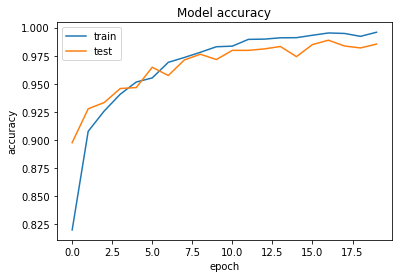

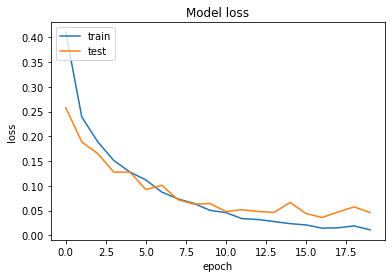

In [67]:
plot_train_history(drowsiness_history)

In [68]:
drowsiness_model.save('Working/sleeping_detection_model.h5')

In [81]:
drowsiness_prediction = (drowsiness_model.predict(drowsiness_X_test_processed) > 0.5).astype("int32")

73/73 [==============================] - 0s 4ms/step


In [71]:
drowsiness_prediction_class = np.argmax(drowsiness_prediction,axis=1)

In [82]:
drowsiness_prediction

array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [73]:
drowsiness_prediction_class

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
drowsiness_prediction_class.sum()

0

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

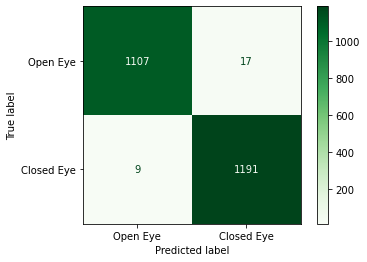

In [86]:
cm = confusion_matrix(drowsiness_Y_test,drowsiness_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Open Eye','Closed Eye'])
disp.plot(cmap = 'Greens')
plt.show()

In [1]:
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score

In [89]:
print("Accuracy Score : ", accuracy_score(drowsiness_Y_test,drowsiness_prediction))
print("Precision Score : ", precision_score(drowsiness_Y_test,drowsiness_prediction))
print("Recall Score : ", recall_score(drowsiness_Y_test,drowsiness_prediction))
print("F1 Score : ", f1_score(drowsiness_Y_test,drowsiness_prediction))

Accuracy Score :  0.9888123924268503
Precision Score :  0.9859271523178808
Recall Score :  0.9925
F1 Score :  0.989202657807309


In [3]:
def augmentation_and_save_image_for_yawning(image_paths, output_folder_path, save=True):
    for image_path in image_paths:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Additional rotations: 90 degrees, 180 degrees, and 20% rotation
        rotated_img_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
        rotated_img_180 = cv2.rotate(img, cv2.ROTATE_180)

        # Compute the rotation matrix for 20% rotation
        center = (img.shape[1] / 2, img.shape[0] / 2)
        rotation_matrix = cv2.getRotationMatrix2D(center, 20, 1.0)
        rotated_img_20 = cv2.warpAffine(img, rotation_matrix, (img.shape[1], img.shape[0]))

        if save:
            # Save the augmented images
            save_prefix = os.path.basename(image_path).split('.')[0]
            for idx, augmented_img in enumerate([rotated_img_90, rotated_img_180, rotated_img_20]):
                augmentation_type = ['rotated_90', 'rotated_180', 'rotated_20']
                cv2.imwrite(os.path.join(output_folder_path, f'{save_prefix}_{augmentation_type[idx]}.jpg'),
                            cv2.cvtColor(augmented_img, cv2.COLOR_RGB2BGR))
        else:
            return [rotated_img_90, rotated_img_180, rotated_img_20]

In [32]:
labels = os.listdir(root_directory)
for label in labels:
    if label == 'Open' or label == 'Closed':
        continue
    images = os.listdir(os.path.join(root_directory, label))
    images = [os.path.join(root_directory, label, img) for img in images]

    os.makedirs(os.path.join(output_directory, label), exist_ok=True)

    # Copy original images to output directory
    for img_path in images:
        img_name = os.path.basename(img_path)
        output_path = os.path.join(output_directory, label, img_name)
        shutil.copy(img_path, output_path)

    # Apply augmentation and save augmented images
    augmentation_and_save_image_for_yawning(images, os.path.join(output_directory, label))

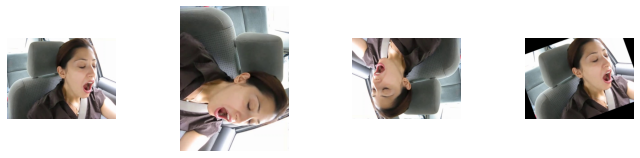

In [4]:
original_img_path = 'Data_Drowsiness_Detection/train/yawn/1.jpg'
original_img = cv2.imread(original_img_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

# Generate augmented images
lst = augmentation_and_save_image_for_yawning([original_img_path], '', False)
lst = [original_img] + lst

# Create a subplot grid without axes
fig, axes = plt.subplots(1, 4, figsize=(10, 5))
fig.tight_layout(pad=3.0)

cols = 4
for i, img_data in enumerate(lst):
    col_index = i % cols

    axes[col_index].imshow(img_data)
    axes[col_index].axis("off")

plt.show()

In [7]:
yawning_image_paths = []
yawning_labels = []

read_images('Working/yawn', yawning_image_paths, yawning_labels, 1)

print(len(yawning_image_paths))
print(len(yawning_labels))

read_images('Working/no_yawn', yawning_image_paths, yawning_labels, 0)

print(len(yawning_image_paths))
print(len(yawning_labels))

2892
2892
5792
5792


In [8]:
yawning_X_train, yawning_X_test, yawning_Y_train, yawning_Y_test = train_test_split(
    yawning_image_paths, yawning_labels, test_size=0.2, random_state=42
)

print(len(yawning_X_train))
print(len(yawning_Y_train))
print(len(yawning_X_test))
print(len(yawning_Y_test))

4633
4633
1159
1159


In [9]:
def preprocess_images_for_yawning(image_paths, target_size=(255, 255)):
    images = []
    for image_path in image_paths:
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, target_size)
        image = image.astype('float32') / 255.0 
        images.append(image)
    return np.array(images)

In [10]:
yawning_X_train_processed = preprocess_images_for_yawning(yawning_X_train)
yawning_X_test_processed = preprocess_images_for_yawning(yawning_X_test)

yawning_Y_train = np.array(yawning_Y_train)
yawning_Y_test = np.array(yawning_Y_test)

# reshape data to fit the model's input shape
yawning_X_train_processed = yawning_X_train_processed.reshape(-1, 255, 255, 3)
yawning_X_test_processed = yawning_X_test_processed.reshape(-1, 255, 255, 3)

print(len(yawning_X_train_processed))
print(len(yawning_Y_train))
print(len(yawning_X_test_processed))
print(len(yawning_Y_test))

4633
4633
1159
1159


In [11]:
input_shape = (255, 255, 3)
n_classes = 2

yawning_model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
   
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
   
    layers.Conv2D(128, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(128, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(128, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(n_classes, activation='softmax')
])
yawning_model.build(input_shape=input_shape)

yawning_model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

yawning_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 253, 253, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [15]:
yawning_history = yawning_model.fit(
    yawning_X_train_processed,
    yawning_Y_train,
    batch_size=64,
    validation_data=(yawning_X_test_processed, yawning_Y_test),
    epochs=100,
    callbacks= callback
)

val_loss, accuracy = yawning_model.evaluate(yawning_X_test_processed, yawning_Y_test)

print(f"Accuracy = {accuracy * 100} %")

Epoch 1/100
73/73 [==============================] - 365s 5s/step - loss: 0.7379 - accuracy: 0.5739 - val_loss: 0.7295 - val_accuracy: 0.5393
Epoch 2/100
73/73 [==============================] - 382s 5s/step - loss: 0.6056 - accuracy: 0.6475 - val_loss: 0.5783 - val_accuracy: 0.6626
Epoch 3/100
73/73 [==============================] - 397s 5s/step - loss: 0.3900 - accuracy: 0.8165 - val_loss: 0.4461 - val_accuracy: 0.7748
Epoch 4/100
73/73 [==============================] - 384s 5s/step - loss: 0.1535 - accuracy: 0.9428 - val_loss: 0.2551 - val_accuracy: 0.9292
Epoch 5/100
73/73 [==============================] - 377s 5s/step - loss: 0.0959 - accuracy: 0.9687 - val_loss: 0.1818 - val_accuracy: 0.9482
Epoch 6/100
73/73 [==============================] - 394s 5s/step - loss: 0.0735 - accuracy: 0.9765 - val_loss: 0.2415 - val_accuracy: 0.8982
Epoch 7/100
73/73 [==============================] - 383s 5s/step - loss: 0.0719 - accuracy: 0.9773 - val_loss: 0.1548 - val_accuracy: 0.9439
Epoch 

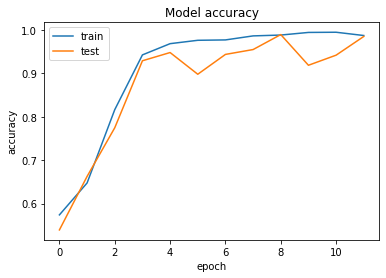

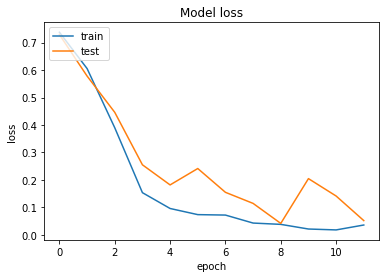

In [16]:
plot_train_history(yawning_history)

In [17]:
yawning_model.save('Working/yawn_detection_model.h5')

In [18]:
yawning_prediction = yawning_model.predict(yawning_X_test_processed)

37/37 [==============================] - 16s 431ms/step


In [46]:
yawning_prediction_class = np.argmax(yawning_prediction,axis=1)

In [47]:
yawning_prediction

array([[1.11776241e-03, 9.98882234e-01],
       [2.43678968e-03, 9.97563243e-01],
       [3.79506295e-04, 9.99620438e-01],
       ...,
       [1.16404386e-04, 9.99883533e-01],
       [8.74177292e-02, 9.12582278e-01],
       [1.05305207e-06, 9.99998927e-01]], dtype=float32)

In [48]:
yawning_prediction_class

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [49]:
yawning_prediction.shape

(1159, 2)

In [50]:
yawning_Y_test.shape

(1159,)

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

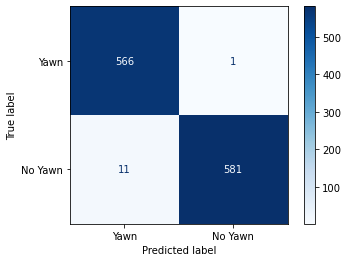

In [52]:
cm = confusion_matrix(yawning_Y_test,yawning_prediction_class)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Yawn','No Yawn'])
disp.plot(cmap = 'Blues')
plt.show()

In [55]:
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score

In [56]:
print("Accuracy Score : ", accuracy_score(yawning_Y_test, yawning_prediction_class))
print("Precision Score : ", precision_score(yawning_Y_test, yawning_prediction_class))
print("Recall Score : ", recall_score(yawning_Y_test, yawning_prediction_class))
print("F1 Score : ", f1_score(yawning_Y_test, yawning_prediction_class))

Accuracy Score :  0.9896462467644521
Precision Score :  0.9982817869415808
Recall Score :  0.981418918918919
F1 Score :  0.9897785349233391


In [7]:
right_eye_cascade = cv2.CascadeClassifier('haarcascade_righteye_2splits.xml')
left_eye_cascade = cv2.CascadeClassifier('haarcascade_lefteye_2splits.xml')

In [8]:
def crop_right_eye(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    right_eye = right_eye_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
    
    if len(right_eye) > 0:
        x, y, w, h = right_eye[0]
        right_eye_roi = image[y:y + h, x:x + w]
        return right_eye_roi
    else:
        # If no right_eye is detected, return the original image
        print('No right eye Detected')
        return image

In [9]:
def crop_left_eye(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    left_eye = left_eye_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
    
    if len(left_eye) > 0:
        x, y, w, h = left_eye[0]
        left_eye_roi = image[y:y + h, x:x + w]
        return left_eye_roi
    else:
        # If no left_eye is detected, return the original image
        print('No left eye Detected')
        return image

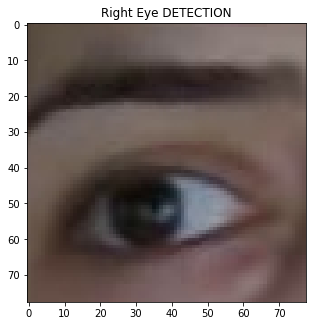

In [10]:
original_img_path = 'Data_Drowsiness_Detection/train/no_yawn/2588.jpg'
original_img = cv2.imread(original_img_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,10))
plt.title('Right Eye DETECTION')
result = crop_right_eye(original_img)
plt.imshow(result)

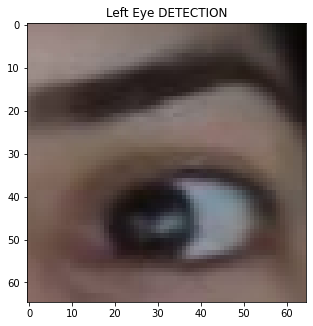

In [11]:
original_img_path = 'Data_Drowsiness_Detection/train/no_yawn/2588.jpg'
original_img = cv2.imread(original_img_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,10))
plt.title('Left Eye DETECTION')
result = crop_left_eye(original_img)
plt.imshow(result)

In [13]:
99# define a function to predict drowsiness
def predict_drowsiness(test_image_path, loaded_model, target_size=(24, 24)):
    img = cv2.imread(test_image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.imshow(img)
    plt.show()

    # Crop right eye and predict its class
    right_eye = crop_right_eye(img)
    right_eye = cv2.cvtColor(right_eye, cv2.COLOR_BGR2GRAY)
    right_eye = cv2.resize(right_eye, target_size)
    
    right_eye = right_eye.astype('float32') / 255.0
    
    right_eye = np.array(right_eye)
    
    right_eye = right_eye.reshape(-1, 24, 24, 1)
    
    right_eye_predictions = loaded_model.predict(right_eye)

    right_eye_class_label = "Open" if right_eye_predictions[0][0] > 0.5 else "Closed"

    print(f"The predicted class for right eye is: {right_eye_class_label}")

    # Crop left eye and predict its class
    
    left_eye = crop_left_eye(img)
    left_eye = cv2.cvtColor(left_eye, cv2.COLOR_BGR2GRAY)
    left_eye = cv2.resize(left_eye, target_size)
    left_eye = left_eye.astype('float32') / 255.0  # Normalize pixel values
    
    left_eye = np.array(left_eye)
    
    left_eye = left_eye.reshape(-1, 24, 24, 1)
    
    left_eye_predictions = loaded_model.predict(left_eye)

    left_eye_class_label = "Open" if left_eye_predictions[0][0] > 0.5 else "Closed"

    print(f"The predicted class for the left eye is: {left_eye_class_label}")

    # Get the final prediction
    if right_eye_class_label == "Closed" and left_eye_class_label == "Closed":
        final_prediction = "Closed"
    else:
        final_prediction = "Open"
    
    return final_prediction

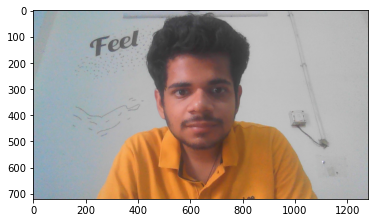

1/1 [==============================] - 1s 680ms/step
The predicted class for right eye is: Open
1/1 [==============================] - 0s 40ms/step
The predicted class for the left eye is: Open
Open


In [14]:
loaded_model = tf.keras.models.load_model('Working/sleeping_detection_model.h5')
img_path = 'Test_images/WIN_20240429_10_04_01_Pro.jpg'
pred = predict_drowsiness(img_path,loaded_model)
print(pred)

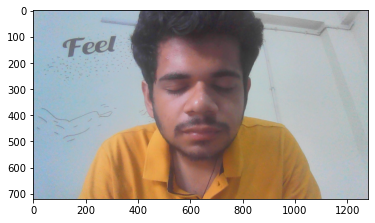

No right eye Detected
1/1 [==============================] - 0s 150ms/step
The predicted class for right eye is: Open
1/1 [==============================] - 0s 51ms/step
The predicted class for the left eye is: Closed
Open


In [19]:
loaded_model = tf.keras.models.load_model('Working/sleeping_detection_model.h5')
img_path = 'Test_images/WIN_20240429_10_21_53_Pro.jpg'
pred = predict_drowsiness(img_path,loaded_model)
print(pred)

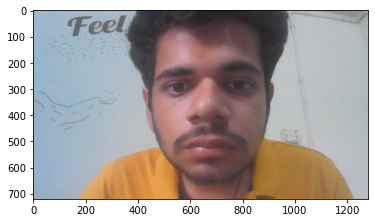

1/1 [==============================] - 0s 150ms/step
The predicted class for right eye is: Open
1/1 [==============================] - 0s 50ms/step
The predicted class for the left eye is: Open
Open


In [20]:
loaded_model = tf.keras.models.load_model('Working/sleeping_detection_model.h5')
img_path = 'Test_images/WIN_20240429_10_31_18_Pro.jpg'
pred = predict_drowsiness(img_path,loaded_model)
print(pred)

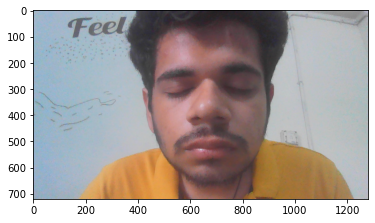

1/1 [==============================] - 0s 142ms/step
The predicted class for right eye is: Closed
1/1 [==============================] - 0s 40ms/step
The predicted class for the left eye is: Closed
Closed


In [21]:
loaded_model = tf.keras.models.load_model('Working/sleeping_detection_model.h5')
img_path = 'Test_images/WIN_20240429_10_31_21_Pro.jpg'
pred = predict_drowsiness(img_path,loaded_model)
print(pred)

In [22]:
classes = ["no_yawn", "yawn"]

# define a function to predict yawning
def predict_yawning(test_image_path, loaded_model, target_size=(255, 255)):
    img = cv2.imread(test_image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.imshow(img)
    plt.show()
    
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, target_size)
    img = img.astype('float32') / 255.0  # Normalize pixel values
    img = np.array(img)
    img = img.reshape(-1, 255, 255, 3)
    
    predictions = loaded_model.predict(img)
    
    print(predictions)
    print(np.argmax(predictions))
    
    confidance = round(100 * (np.max(predictions)), 2)
    print("confidance ")
    print(confidance)
    
#     class_label = "yawn" if predictions[0][0] > 0.5 else "no_yawn"
    class_label = classes[np.argmax(predictions)]
    
    return class_label

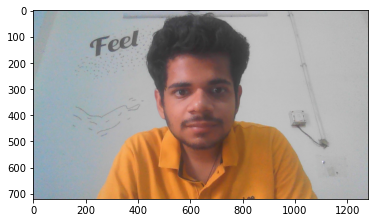

1/1 [==============================] - 0s 282ms/step
[[0.8939448  0.10605522]]
0
confidance 
89.39
no_yawn


In [23]:
loaded_model = tf.keras.models.load_model('Working/yawn_detection_model.h5')
img_path = 'Test_images/WIN_20240429_10_04_01_Pro.jpg'
pred = predict_yawning(img_path,loaded_model)
print(pred)

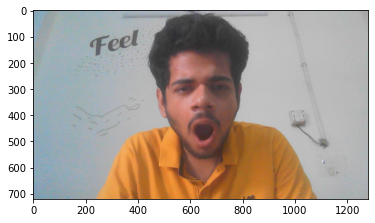

1/1 [==============================] - 0s 245ms/step
[[0.01953041 0.98046964]]
1
confidance 
98.05
yawn


In [24]:
loaded_model = tf.keras.models.load_model('Working/yawn_detection_model.h5')
img_path = 'Test_images/WIN_20240429_10_04_09_Pro.jpg'
pred = predict_yawning(img_path,loaded_model)
print(pred)